# PROJECT ZOMATO API I

In [2]:
# Importing required Libraries ---

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Here I'm loading the "zomato.csv" file and making a copy of that in variable named 'df' to keep the data clean :

df_orig=pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df=df_orig.copy()

## QUESTION 1.1

Delhi-NCR 7947
Rest of India 705


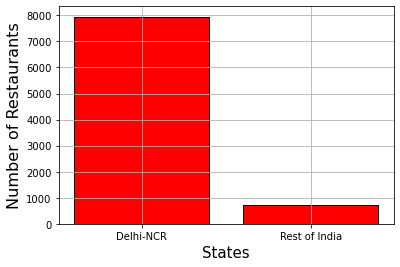

In [7]:
# Since we have to take data for India only so refining it using Country Code of India i.e 1 ---- 
df = df[df['Country Code'] == 1]

# Here I'm replacing cities which we have to name as Delhi-NCR ----

df['City'].replace('New Delhi','Delhi-NCR',inplace = True)
df['City'].replace('Ghaziabad','Delhi-NCR',inplace = True)
df['City'].replace('Noida','Delhi-NCR',inplace = True)
df['City'].replace('Gurgaon','Delhi-NCR',inplace = True)
df['City'].replace('Faridabad','Delhi-NCR',inplace = True)

#Here I'm dropping those cities which have empty value ----

index = df[df['City']==''].index
df.drop(index,inplace = True)

ans = df.copy()

#Here we are separating cities of Delhi-NCR with rest of India ----


Delhi_cities = df[df['City']=="Delhi-NCR"]
other_cities = ans[ans['City']!="Delhi-NCR"]

# Here we are taking out number of restaurants for plotting graph ----
val = [len(Delhi_cities),len(other_cities)]


print('Delhi-NCR',val[0])
print('Rest of India',val[1])

#Plotting Graphs

plt.bar(["Delhi-NCR","Rest of India"],val,edgecolor = 'black',color = 'red')
plt.xlabel("States",fontsize = 15)
plt.grid()
plt.ylabel("Number of Restaurants",fontsize = 16)
plt.show()

## QUESTION 1.2

In [23]:
df=df_orig.copy()

# Since we have to take data for India only so refining it using Country Code of India i.e 1 ---- 

df = df[df['Country Code']==1]

# Here I'm replacing cities which we have to name as Delhi-NCR ----

df['City'].replace('New Delhi','Delhi-NCR',inplace = True)
df['City'].replace('Ghaziabad','Delhi-NCR',inplace = True)
df['City'].replace('Noida','Delhi-NCR',inplace = True)
df['City'].replace('Gurgaon','Delhi-NCR',inplace = True)
df['City'].replace('Faridabad','Delhi-NCR',inplace = True)
df['City'].replace('Delhi-NCR','Delhi-NCR',inplace = True)

# Cleaning all the null values using notnull() and keeping the remaining values in the dataframe ----

df=df.loc[df.Cuisines.notnull()]

#Separating values of Delhi and rest of India

ans = df[df['City']!='Delhi-NCR']
df = df[df['City']=='Delhi-NCR']
delhi_cuisines = []

#Taking out cuisines of Delhi in a list

for i in df['Cuisines']:
    temp = i.split(',')
    for j in temp:
        j = j.strip()
        delhi_cuisines.append(j)
        
#Taking each cuisine for one time only

delhi_cuisines = set(delhi_cuisines)

#Taking out cuisines of Delhi in a list

df = ans 
other_state_cuisines = []
for i in df['Cuisines']:
    temp = i.split(',')
    for j in temp:
        j = j.strip()
        other_state_cuisines.append(j)

#Taking each cuisine for one time only

other_state_cuisines = set(other_state_cuisines)

#Taking out cuisines which are not present in restaurants of Delhi
non_delhi = other_state_cuisines - delhi_cuisines
print(non_delhi)
print("---------------------------------------")
# apikey=ca4e43cab537d8c6ac9ddcfc8342b790 ----
# cityID of Delhi-NCR is : 1 ----
# Here I'm extracting the cuisines present in delhi ncr according to the zomato api ----

import requests as req
params={"user_key":'e163afa832578683e99cfb35ef1c0c56',"city_id":1}
headers={"Accept": "application/json","user-key":"ca4e43cab537d8c6ac9ddcfc8342b790"}
response=req.get('https://developers.zomato.com/api/v2.1/cuisines',headers=headers,params=params)
data=response.json()
delhi_cus_api=[]
for i in data['cuisines']:
    delhi_cus_api.append(i['cuisine']['cuisine_name'])

#Taking each cuisine of delhi for one time only ----
    
delhi_cus_api=set(delhi_cus_api)

for i in delhi_cus_api:
    if i in non_delhi:
        print(i)

{'German', 'BBQ', 'Cajun', 'Malwani'}
---------------------------------------
BBQ
Malwani


## QUESTION 1.3

In [25]:
df=df_orig.copy()

# Since we have to take data for India only so refining it using Country Code of India i.e 1 ---- 

df = df[df['Country Code']==1]

#Here I'm replacing cities which we have to name as Delhi-NCR ----

df['City'].replace('New Delhi','Delhi-NCR',inplace = True)
df['City'].replace('Ghaziabad','Delhi-NCR',inplace = True)
df['City'].replace('Noida','Delhi-NCR',inplace = True)
df['City'].replace('Gurgaon','Delhi-NCR',inplace = True)
df['City'].replace('Faridabad','Delhi-NCR',inplace = True)
df['City'].replace('Delhi-NCR','Delhi-NCR',inplace = True)

# Cleaning all the null values using notnull() and keeping the remaining values in the dataframe ----

df=df.loc[df.Cuisines.notnull()]

# Separating data of Delhi NCR and Rest of India ----
ans = df[df['City']!='Delhi-NCR']
df = df[df['City']=='Delhi-NCR']

#Taking out cuisines of Delhi in a dictioanry ----

delhi_cuisines = {}
for i in df['Cuisines']:
    temp = i.split(',')
    for j in temp:
        j = j.strip()
        delhi_cuisines[j] =delhi_cuisines.get(j,0)+1
        
#Sorting cuisines in descending order according to number of times they are present ----  
a = sorted(delhi_cuisines.items(), key=lambda x: x[1],reverse = True)
print('Cuisines present in resturants of Delhi-NCR')
print('---------')

#Printing the top 10 Cuisines present in Delhi NCR ----
for j in range(10):
    print(a[j][0],a[j][1])
df = ans 
other_cuisines = {}
for i in df['Cuisines']:
    temp = i.split(',')
    for j in temp:
        j = j.strip()
        other_cuisines[j] = other_cuisines.get(j,0)+1

#Printing the top 10 Cuisines present in India except Delhi ----
        
a = sorted(other_cuisines.items(), key=lambda x: x[1],reverse = True)

print()

print('Cuisines present in resturants of Rest of India Except Delhi-NCR')
print('---------')

#Printing the top 10 Cuisines present in India except Delhi-NCR ----

for j in range(10):
    print(a[j][0],a[j][1])

Cuisines present in resturants of Delhi-NCR
---------
North Indian 3597
Chinese 2448
Fast Food 1866
Mughlai 933
Bakery 697
South Indian 569
Continental 547
Desserts 542
Street Food 538
Italian 535

Cuisines present in resturants of Rest of India Except Delhi-NCR
---------
North Indian 349
Chinese 242
Continental 177
Italian 147
Cafe 136
Fast Food 97
South Indian 62
Mughlai 59
Desserts 55
Mexican 50


## QUESTION 1.4

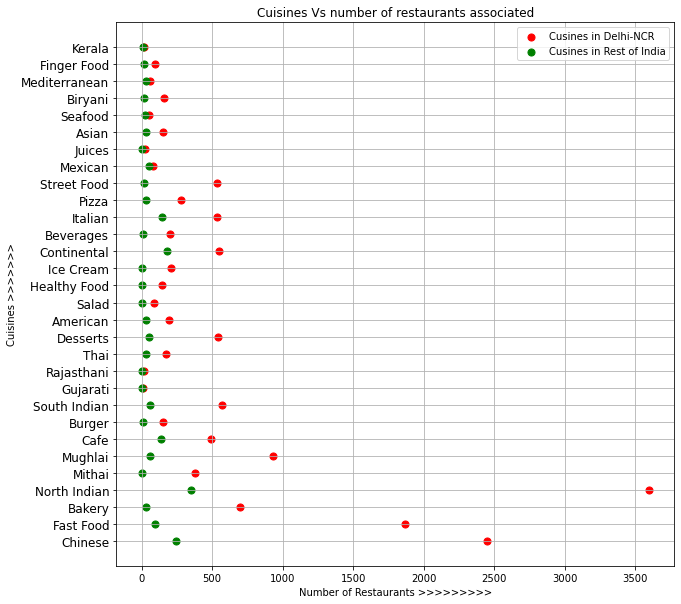

In [26]:
# Here I'm creating 3 lists which will contain cuisines count, cuisines of delhi, cuisines of rest of india

cuisine=[]
cus_delhi=[] 
cus_other=[] 

for i in delhi_cuisines.keys():
    if i in other_cuisines:
        cuisine.append(i)
        cus_delhi.append(delhi_cuisines[i])
        cus_other.append(other_cuisines[i])

# Graph plotting :
# For better visualization i am using scatter plot here 

plt.figure(figsize=(10,10))
plt.scatter(cus_delhi[0:30],cuisine[0:30],c='red',s=50)
plt.scatter(cus_other[0:30],cuisine[0:30],c='green',s=50)
plt.yticks(size=12)
plt.grid()
plt.xlabel('Number of Restaurants >>>>>>>>>')
plt.ylabel("Cuisines >>>>>>>")
plt.title('Cuisines Vs number of restaurants associated')
plt.legend(['Cusines in Delhi-NCR', 'Cusines in Rest of India'])
plt.show()

## QUESTION  2.1.1

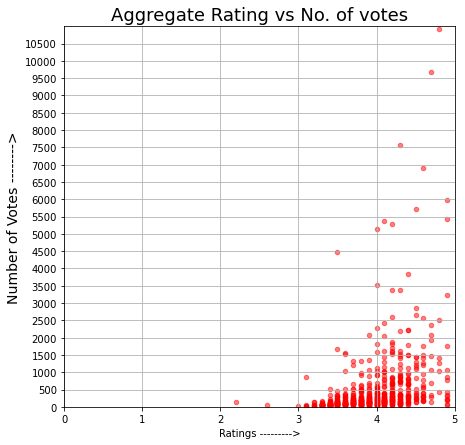

In [27]:
#Plotting Graph :

plt.figure(figsize=(7,7))
plt.scatter(df['Aggregate rating'],df['Votes'], s=20,alpha=0.5,color = 'red')
plt.yticks(np.arange(0,11000,500))
plt.axis([0,5,0,11000])
plt.title("Aggregate Rating vs No. of votes",size = 18)
plt.xlabel("Ratings --------->")
plt.ylabel("Number of Votes -------->", size=14)

plt.grid()
plt.show()

## QUESTION 2.1.2

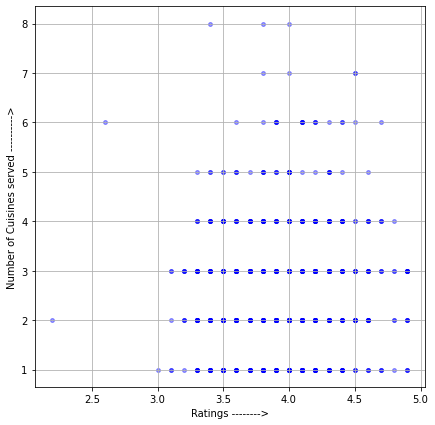

No. of cuisines served :  2 , No. of restaurants serving given number of cuisines :  207
No. of cuisines served :  1 , No. of restaurants serving given number of cuisines :  158
No. of cuisines served :  3 , No. of restaurants serving given number of cuisines :  180
No. of cuisines served :  4 , No. of restaurants serving given number of cuisines :  102
No. of cuisines served :  5 , No. of restaurants serving given number of cuisines :  31
No. of cuisines served :  6 , No. of restaurants serving given number of cuisines :  20
No. of cuisines served :  7 , No. of restaurants serving given number of cuisines :  4
No. of cuisines served :  8 , No. of restaurants serving given number of cuisines :  3


In [28]:
#Here I have removed the null value of Cuisines ----

df=df.loc[df.Cuisines.notnull()]
cuisines=[len(i.split(',')) for i in df.Cuisines]
rating=[i for i in df['Aggregate rating']]

# Plotting Graph : ----

plt.figure(figsize=(7,7))
plt.scatter(rating,cuisines,c='blue',s=15,alpha=0.4)
plt.xlabel('Ratings -------->')
plt.ylabel('Number of Cuisines served ---------->')
plt.grid()
plt.show()

# created Dictionary for the cuisines ----
dic=dict()

# Counting the no. of each cuisines ----
for i in cuisines:
    if i in dic.keys():
        dic[i]+=1
    else:
        dic[i]=1
        
#Printing the cuisines served along with number of restaurants serving given number of cuisines ----              
for i in dic.keys():
    print("No. of cuisines served : ", i, ", No. of restaurants serving given number of cuisines : ", dic[i])

## QUESTION 2.1.3

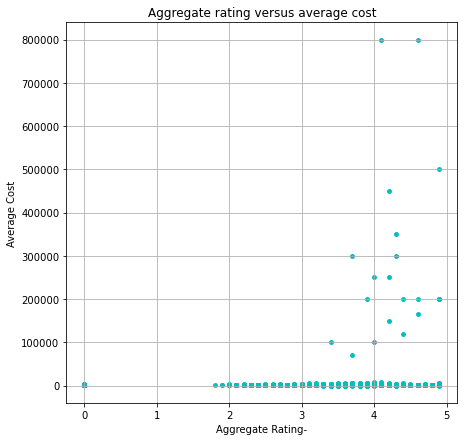

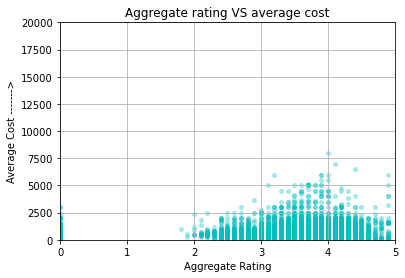

In [30]:
df=df_orig.copy()

# Graph plotting :

plt.figure(figsize=(7, 7))
plt.scatter(df['Aggregate rating'], df['Average Cost for two'], s=15, c='c')
plt.grid()
plt.xlabel('Aggregate Rating-')
plt.ylabel('Average Cost')
plt.title('Aggregate rating versus average cost')
plt.show()


plt.scatter(df['Aggregate rating'], df['Average Cost for two'], s=15, c='c', alpha=0.3)
plt.grid()
plt.axis([0, 5, 0, 20000])
plt.xlabel('Aggregate Rating')
plt.ylabel('Average Cost ------->')
plt.title('Aggregate rating VS average cost')
plt.show()

## QUESTION 2.1.4

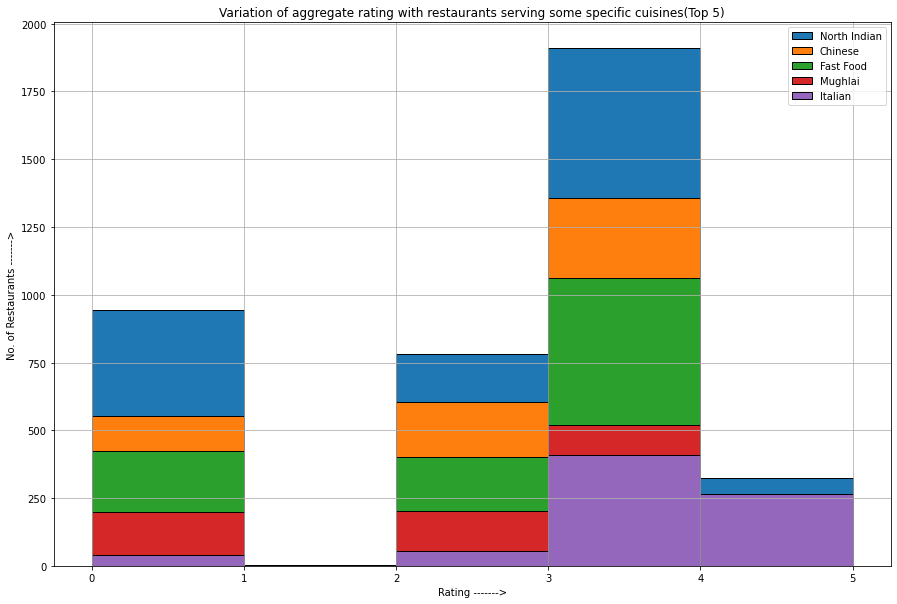

array(['North Indian', 'Chinese', 'Fast Food', 'Mughlai', 'Italian'],
      dtype='<U12')

In [31]:
df=df_orig.copy()
df = df.loc[df["Cuisines"].notnull()]
cuisine =[] 
for i in df["Cuisines"]:
    for j in i.split(","):
        cuisine.append(j)
dic=dict()
for i in cuisine:
    if i.strip() in dic.keys():
        dic[i.strip()]+=1
    else:
        dic[i.strip()]=1
a = sorted(dic.items(), key=lambda x: x[1],reverse = True)
popular = []
for i in range(5):
#     print(a[i][0])
    popular.append(a[i][0])
np_popular = np.array(popular)

# Graph plotting :

plt.figure(figsize=(15,10))
for i in np_popular:
    rating=[]
    for j,k in zip(df.Cuisines, df['Aggregate rating']):
        if i in j:
            rating.append(k)
    plt.hist(rating, edgecolor='black',bins=[0,1,2,3,4,5])
    plt.title('Variation of aggregate rating with restaurants serving some specific cuisines(Top 5)')

    plt.xlabel("Rating ------->")
    plt.ylabel("No. of Restaurants ------->")

plt.grid()
plt.legend(labels=np_popular)
plt.show()
np_popular

## QUESTION 2.2

In [40]:


# Created 3 numpy arrays of aggregate rating,votes,locality

np_rating=np.array([i for i in df['Aggregate rating']])
np_votes=np.array([i for i in df['Votes']])
np_locality=np.array([i for i in df['Locality']])

# Created the dictionry dic and calculated the weighted rating for each loaclity
dic=dict()
for i in set(np_locality):
    if sum(np_votes[np.argwhere(np_locality==i)])[0]!=0:
        dic[i]=sum((np_votes*np_rating)[np.argwhere(np_locality==i)])[0]/sum(np_votes[np.argwhere(np_locality==i)])[0]
# a = sorted(dic.items(), key=lambda x: x[1],reverse = True)

#numpy array of locality
np_local=np.array([i for i in dic.keys()])
#numpy array of weighted restaurant rating
np_wrr=np.array([i for i in dic.values()])
# sorted 
np_local=np_local[np.argsort(np_wrr)][::-1]
np_wrr=np.sort(np_wrr)[::-1]
for i in range(len(np_wrr)):
    print(np_local[i],np_wrr[i])

Fort Street 4.9
Sofitel Philippine Plaza Manila, Pasay City 4.9
Barwa Towers, Al Sadd 4.9
Caddebostan 4.9
Kenwood 4.9
Cengkareng 4.9
Venetian Village, Al Maqtaa 4.9
Nassima Royal Hotel, Trade Centre Area 4.9
Deira City Centre Area 4.9
Taman Impian Jaya Ancol, Ancol 4.9
Beak Street, Soho 4.9
DIFC 4.9
Old Dutch Hospital, Fort 4.9
Gíçvea 4.9
Penjaringan 4.9
Bishopsgate, City Of London 4.9
Bebek 4.9
Pondok Aren 4.9
The Milk District 4.9
Windermere 4.9
New Tampa 4.9
City and Suburban 4.9
Setor De Clubes Esportivos Sul 4.9
Marshalltown 4.9
West Park 4.9
Paia 4.9
Lexington Street, Soho 4.9
Aminabad 4.9
Hotel Clarks Amer, Malviya Nagar 4.9
Friends Colony 4.886916367367881
Powai 4.841868613138686
Kirlampudi Layout 4.820161290322581
Express Avenue Mall,  Royapettah 4.8
Dubai Media City 4.8
Deccan Gymkhana 4.8
Hotel Unique, Jardim Paulista 4.8
Century City Mall, Poblacion, Makati City 4.8
Sanford 4.8
UP Town Center, Diliman, Quezon City 4.8
Muwailih Commercial 4.8
Centro 4.8
Galeria River, Copaca

Dicky Beach 3.6
Nuvali, Don Jose, Santa Rosa 3.6
Sudoeste 3.5999999999999996
Lakeview 3.5999999999999996
Lorn 3.5999999999999996
Handsworth 3.5999999999999996
INA 3.5993006993006995
Indirapuram 3.588034188034188
Kamla Nagar 3.581042128603105
Sector 5 3.5807291666666665
Community Centre, New Friends Colony 3.578444297956493
MGF Metropolitan Mall, Saket 3.5749100257069406
Jangpura 3.5748839368616525
The Suryaa New Delhi, New Friends Colony 3.569105691056911
Dubuque 3.5646709549727857
Spark Mall, Kamla Nagar 3.5632867132867134
Sector 31 3.5603240548400503
Oxford Road 3.5603174603174605
Helen 3.555298651252408
Basant Nagar 3.552217741935484
Bhelupur 3.5487544483985767
Sushant Lok 3.5461325966850827
JNU 3.5418032786885236
Sector 18 3.540651839797485
Essex Farms 3.539840637450199
Jail Road 3.538382687927108
Bon Vivant, College Road 3.538053097345133
Sector 12 3.535897435897436
Karkardooma 3.5331580575317045
Ashok Vihar Phase 2 3.531583440034144
Holiday Inn, Mayur Vihar 3.5271523178807946
Lal

In [41]:
print("Top 10 localities with more weighted restaurant rating :")
print("--------------------------------------------------------")
for i in range(10):
    print(np_local[i])

Top 10 localities with more weighted restaurant rating :
--------------------------------------------------------
Fort Street
Sofitel Philippine Plaza Manila, Pasay City
Barwa Towers, Al Sadd
Caddebostan
Kenwood
Cengkareng
Venetian Village, Al Maqtaa
Nassima Royal Hotel, Trade Centre Area
Deira City Centre Area
Taman Impian Jaya Ancol, Ancol


## QUESTION 3.1

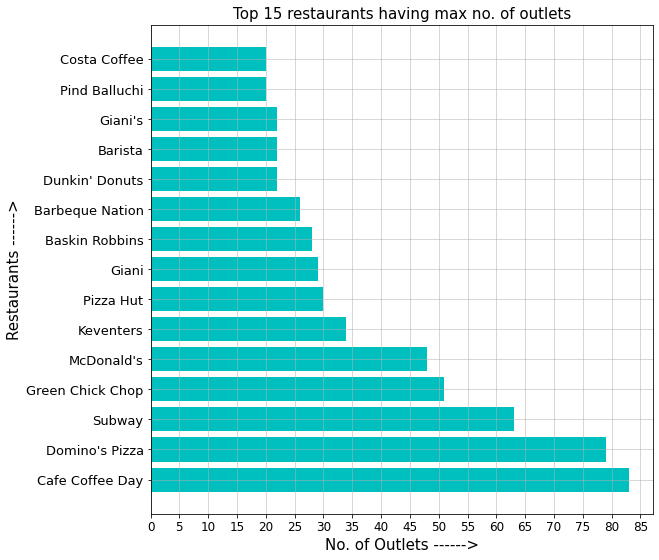

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_orig=pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df=df_orig.copy()

#Taking out top 15 restaurants according to number of times they are present ----

ans = df['Restaurant Name'].value_counts()[0:15]

#Separating the index and values of the restaurants we have taken out above ----

x = ans.index
y = ans.values

#Plotting graph

plt.figure(figsize=(9,9))
plt.barh(x,y,color = 'c')
plt.title("Top 15 restaurants having max no. of outlets", fontsize =15)
plt.xlabel("No. of Outlets ------>",fontsize = 15)
plt.ylabel("Restaurants ------>",fontsize = 15)
plt.xticks(np.arange(0, 90, 5), size=12)
plt.yticks(size=13)
plt.grid(linewidth = 0.5)
plt.show()

## QUESTION 3.2

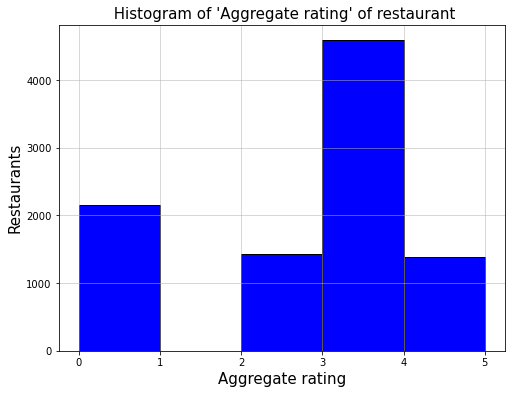

In [44]:
#Dropping unrated restaurants -----

index = df[df['Aggregate rating']==''].index
df.drop(index,inplace = True)
rating = df["Aggregate rating"].dropna()

# Plotting graph ----

plt.figure(figsize=(8,6))
plt.hist(rating,edgecolor = "black",color = "BLUE",bins=range(6))
plt.title(" Histogram of 'Aggregate rating' of restaurant", fontsize =15)
plt.xlabel("Aggregate rating",fontsize = 15)
plt.ylabel("Restaurants",fontsize = 15)
plt.grid(linewidth = 0.5)
plt.show()

## QUESTION 3.3

Barbeque Nation 28142
AB's - Absolute Barbecues 13400
Toit 10934
Big Chill 10853
Farzi Cafe 10098
Truffles 9682
Chili's 8156
Hauz Khas Social 7931
Joey's Pizza 7807
Peter Cat 7574


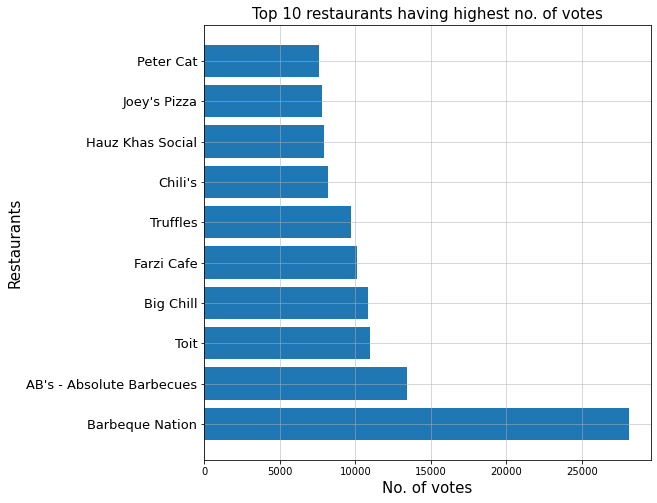

In [50]:
#Dropping Empty restaurants and Votes ----

index = df[df['Restaurant Name']==''].index
df.drop(index,inplace = True)
index = df[df['Votes']==''].index
df.drop(index,inplace = True)

# Using Group by to count top 10 restaurant with highest number of votes ----

ans = df.groupby('Restaurant Name')['Votes'].sum().sort_values(ascending = False)[0:10]
x = ans.index
y = ans.values

# Printing the result ----

for i in range(len(ans)):
    print(x[i],y[i])

#Plotting graph ----    
    
plt.figure(figsize=(8,8))
plt.barh(x,y)
plt.title("Top 10 restaurants having highest no. of votes", fontsize =15)
plt.xlabel("No. of votes",fontsize = 15)
plt.ylabel("Restaurants",fontsize = 15)
plt.yticks(size=13)

plt.grid(linewidth = 0.5)
plt.show()

## QUESTION 3.4

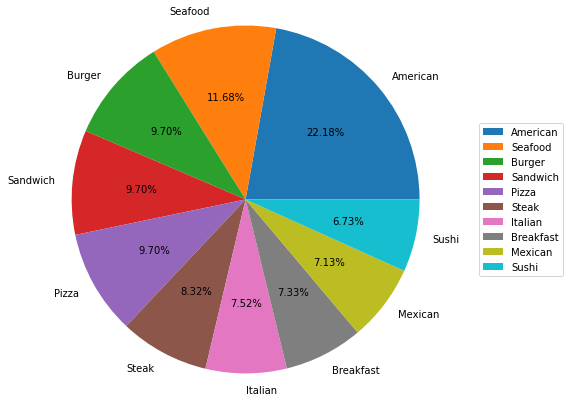

In [52]:


#Refining data using country code ----

df = df[df['Country Code']==216]

#Taking only not null values ----

df=df.loc[df['Cuisines'].notnull()]   

#Taking cuisines along with their frequency in a dictionary

d = {}
for i in df['Cuisines']:
    temp = i.split(',')
    for j in temp:
        j = j.strip()
        d[j] = d.get(j,0)+1
        
# Taking out top 10 cusines with highest frequecy ----        
maxValue=[]
maxKey=[]

for i in range(10):
 ma_v=0   
 ma = ''   
 for i in d:
    if d[i]>ma_v:
        ma = i
        ma_v = d[i]
 d[ma] = 0

 maxKey.append(ma)
 maxValue.append(ma_v) 

# Plotting Graph ----
colors = ["blue","purple","red","pink","yellow"]  
plt.pie(maxValue,labels =maxKey ,autopct= "%.2f%%",radius = 2)
plt.legend(bbox_to_anchor=(1.55,0.5),loc = "center left")

plt.show()

## QUESTION 3.5

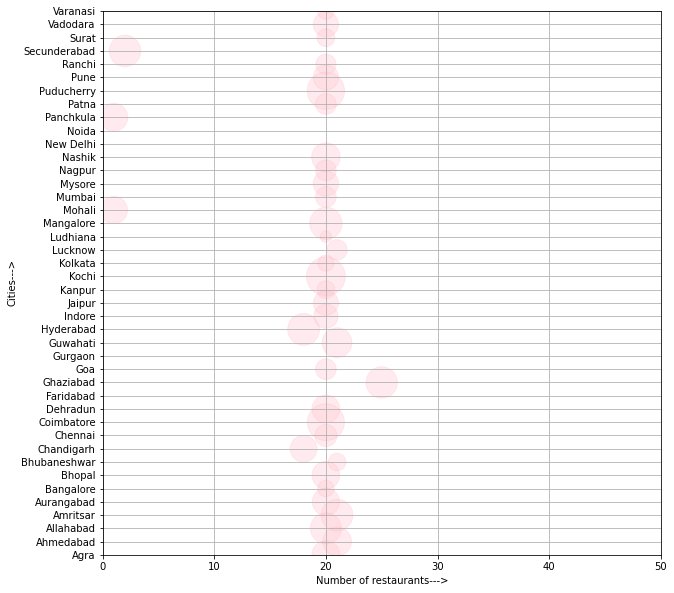

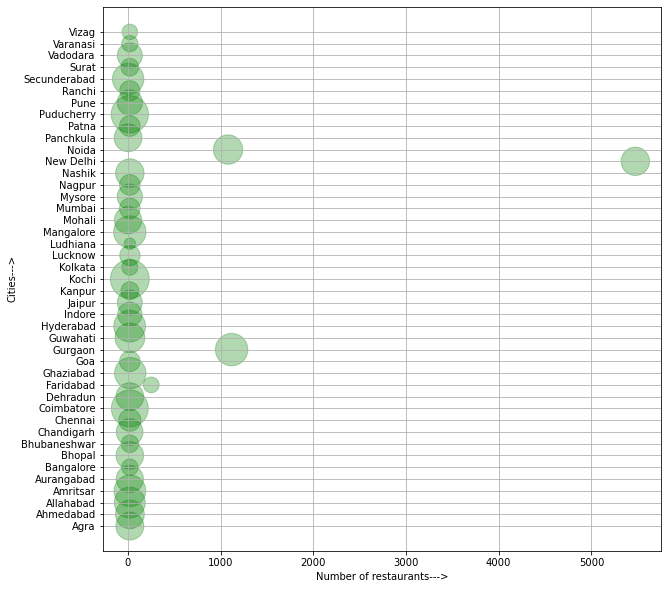

In [55]:
# I have used the country code of India to get only data of country India 
df=df_orig.copy()
df=df.loc[df["Country Code"]==1]

# Created 3 numpy arrays of aggregate rating,votes,City

np_rating=np.array([i for i in df['Aggregate rating']])
np_votes=np.array([i for i in df['Votes']])
np_city=np.array([i for i in df['City']])

# Created the dictionary and calculated the Weighted Restaurant Rating
dic=dict()
for i in set(np_city):
    if sum(np_votes[np.argwhere(np_city==i)])[0]!=0:
        dic[i]=sum((np_votes*np_rating)[np.argwhere(np_city==i)])[0]/sum(np_votes[np.argwhere(np_city==i)])[0]

# Created the new dic1 dictionary which keeps the count of each city present in dataset

dic1=dict()

for i in np_city:
    if i in dic1.keys():
        dic1[i]+=1
    else:
        dic1[i]=1
# Appended the values in list
size=[]
for i in dic:
    size.append(dic[i])
    

# Plotting Graph:

plt.figure(figsize=(10, 10))
plt.scatter(dic1.values(), dic1.keys(), s=5**np.array(size), alpha=0.3, c='pink')
plt.xlabel('Number of restaurants--->')
plt.ylabel('Cities--->')
plt.axis([0, 50, 'Agra', 'Varanasi'])
plt.grid()
plt.show()


plt.figure(figsize=(10, 10))

plt.scatter(dic1.values(), dic1.keys(), s=5**np.array(size), alpha=0.3, c='green')
plt.xlabel('Number of restaurants--->')
plt.ylabel('Cities--->')
plt.grid()
plt.show()